# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Use caution when interpreting the code or results.

This notebook demonstrates how to explore and analyze data from Dandiset 001195, which contains
data supporting the publication "Separable Dorsal Raphe Dopamine Projections Mediate the
Facets of Loneliness-like State". The dataset includes in vivo calcium imaging data with
supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings.

More information about this Dandiset can be found at:

https://dandiarchive.org/dandiset/001195

This notebook will cover the following:

1.  Loading the Dandiset metadata and listing its assets.
2.  Loading an NWB file containing patch-clamp electrophysiology data.
3.  Visualizing example voltage and current clamp data.
4.  Summarizing findings and suggesting further analysis.

## Required Packages

The following packages are required to run this notebook:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `numpy`

Assume that these packages are already installed.

## Loading the Dandiset

This section shows how to load the Dandiset metadata and list its assets using the DANDI API.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

Found 230 assets in the dataset

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb


## Loading and Visualizing Electrophysiology Data

This section demonstrates how to load and visualize electrophysiology data from an NWB file
in the Dandiset. We will load the NWB file
`sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`.

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
# Use seaborn styling for a nicer look
import seaborn as sns
sns.set_theme()

# Load
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Now that we have the NWB file loaded, we can explore the data it contains. According to the
`nwb-file-info` output, this file contains current clamp and voltage clamp data. We will
start by visualizing some of the current clamp data.

The current clamp data is stored in the `nwb.acquisition` dictionary. Let's look at the keys
of this dictionary to see what data is available.

In [3]:
print(nwb.acquisition.keys())

dict_keys(['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0', 'current_clamp-response-03-ch-1', 'current_clamp-response-04-ch-0', 'current_clamp-response-04-ch-1', 'current_clamp-response-05-ch-0', 'current_clamp-response-05-ch-1', 'current_clamp-response-06-ch-0', 'current_clamp-response-06-ch-1', 'current_clamp-response-07-ch-0', 'current_clamp-response-07-ch-1', 'current_clamp-response-08-ch-0', 'current_clamp-response-08-ch-1', 'current_clamp-response-09-ch-0', 'current_clamp-response-09-ch-1', 'current_clamp-response-10-ch-0', 'current_clamp-response-10-ch-1', 'current_clamp-response-11-ch-0', 'current_clamp-response-11-ch-1', 'current_clamp-response-12-ch-0', 'current_clamp-response-12-ch-1', 'current_clamp-response-13-ch-0', 'current_clamp-response-13-ch-1', 'current_clamp-response-14-ch-0', 'current_clamp-response-14-ch-1', 'current_clamp-response-15-ch-0', 'cu

We see a number of `current_clamp-response` keys. Let's load the data from
`current_clamp-response-01-ch-0` and plot it.

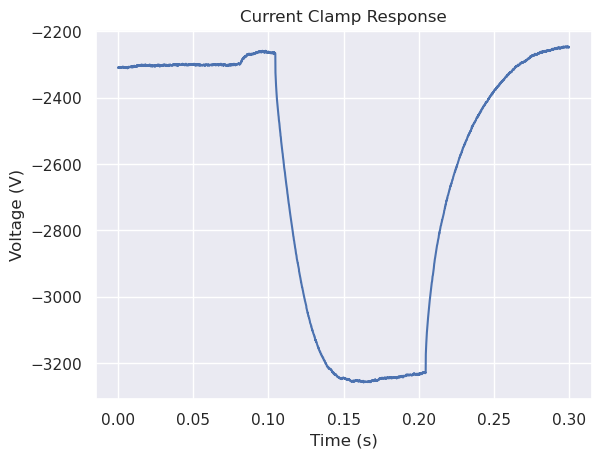

In [4]:
current_clamp_response = nwb.acquisition["current_clamp-response-01-ch-0"]
data = current_clamp_response.data[:]
timestamps = np.arange(0, len(data) / current_clamp_response.rate, 1 / current_clamp_response.rate)
plt.figure()
plt.plot(timestamps, data)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Current Clamp Response")
plt.show()

We can also load the stimulus data and plot it. The stimulus data is stored in the
`nwb.stimulus` dictionary. Let's look at the keys of this dictionary to see what data is
available.

In [5]:
print(nwb.stimulus.keys())

dict_keys(['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0', 'stimulus-03-ch-1', 'stimulus-04-ch-0', 'stimulus-04-ch-1', 'stimulus-05-ch-0', 'stimulus-05-ch-1', 'stimulus-06-ch-0', 'stimulus-06-ch-1', 'stimulus-07-ch-0', 'stimulus-07-ch-1', 'stimulus-08-ch-0', 'stimulus-08-ch-1', 'stimulus-09-ch-0', 'stimulus-09-ch-1', 'stimulus-10-ch-0', 'stimulus-10-ch-1', 'stimulus-11-ch-0', 'stimulus-11-ch-1', 'stimulus-12-ch-0', 'stimulus-12-ch-1', 'stimulus-13-ch-0', 'stimulus-13-ch-1', 'stimulus-14-ch-0', 'stimulus-14-ch-1', 'stimulus-15-ch-0', 'stimulus-15-ch-1', 'stimulus-16-ch-0', 'stimulus-16-ch-1', 'stimulus-17-ch-0', 'stimulus-17-ch-1', 'stimulus-18-ch-0', 'stimulus-18-ch-1', 'stimulus-19-ch-0', 'stimulus-19-ch-1', 'stimulus-20-ch-0', 'stimulus-20-ch-1', 'stimulus-21-ch-0', 'stimulus-21-ch-1', 'stimulus-22-ch-0', 'stimulus-22-ch-1', 'stimulus-23-ch-0', 'stimulus-23-ch-1', 'stimulus-24-ch-0', 'stimulus-24-ch-1', 'stimulus-25-ch-0', 'stimulus

We see keys like `stimulus-01-ch-0`.  Let's load the data from `stimulus-01-ch-0` and plot it.

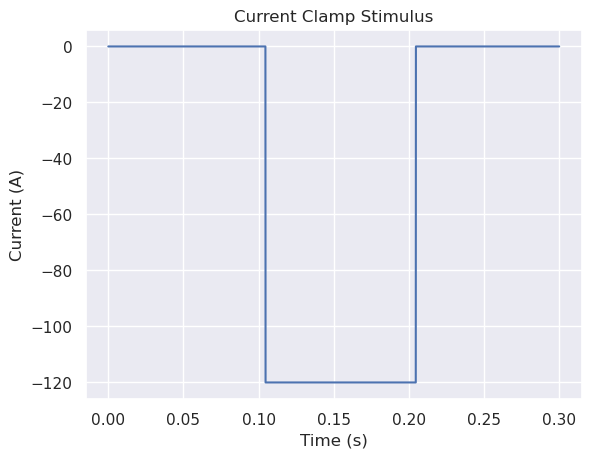

In [6]:
current_clamp_stimulus = nwb.stimulus["stimulus-01-ch-0"]
data = current_clamp_stimulus.data[:]
timestamps = np.arange(0, len(data) / current_clamp_stimulus.rate, 1 / current_clamp_stimulus.rate)
plt.figure()
plt.plot(timestamps, data)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title("Current Clamp Stimulus")
plt.show()

## Summary and Future Directions

This notebook demonstrated how to load and visualize data from Dandiset 001195. We showed how
to load the Dandiset metadata, list its assets, load an NWB file containing patch-clamp
electrophysiology data, and visualize example voltage and current clamp data.

Possible future directions for analysis include:

1.  Exploring other NWB files in the Dandiset.
2.  Visualizing other types of data, such as calcium imaging data or behavioral videos.
3.  Performing more advanced analysis of the electrophysiology data, such as spike detection or
    feature extraction.